*Auteurs* : Alioune KA & Boubacar TRAORE 

# TP2 : Echantillonnage - Représentation temps-fréquence 

In [1]:
from __future__ import division

import warnings
warnings.filterwarnings('ignore')


import pylab as pyl
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

    # Import custom functions
import utils_tp

    # Import audio tools
from IPython.display import Audio

    # Import nt_toolbox
from nt_toolbox.general import *
from nt_toolbox.signal import *
from nt_toolbox.load_sound import *

    # Plot figure inside notebook
%matplotlib inline

    # For external code
%load_ext autoreload
%autoreload 2

## Partie 1 : Transformée de Fourier, échantillonnage et repliement

On travaille avec des signaux à bande limitée par $F_{max} = 2000$ Hz que l'on étudie sur une durée $T = 1$s . On considère la somme de 2 signaux sinusoidaux $s_1(t)$ de fréquence $f_1 = F_{max}/10$ et $s_2(t)$ de fréquence $f_2 = 10/13 * F_{max}$. 

Soit $s(t) = s_1(t) + s_2(t)$. Le but de cette partie est de mettre en évidence les conséquences d'un échantillonnage adapté ou non au contenu du signal (présence d'aliasing lorsque $Fe$ est trop faible).


In [2]:
Fmax = 2000   # bande de frequence des signaux utilises
T = 1         # duree du signal

On considère des versions "continues" (suréchantillonnées) de ces
signaux qui serviront de référence théorique dans les représentations graphiques 

In [3]:
Fec=30*Fmax
t = np.linspace(0,T,num=Fec*T)  # pour définir une liste de 30*Fmax*T échantillons de 0 à T
s1 = 0.5*np.sin(2*np.pi*Fmax/10*t)    # valeurs de s1 aux instants t
s2 = 0.5*np.sin(2*np.pi*10*Fmax/13*t) #  valeurs de s2 aux instants t
s  = s1 + s2

La fonction *Audio* permet d'écouter le signal à une fréquence échantillonnée $Fe$ donnée.

In [4]:
# On écouter ces signaux "quasi continus" 
Audio(s, rate=Fec)

### 1.1 Echantillonner sans aliasing (repliement)

On échantillonne tout d'abord les signaux avec une fréquence d'échantillonnage $Fe_1 = 2F_{max}$ 

In [5]:
Fe1  = 2*Fmax                      # 1ere frequence d'echantillonnage 
te   = np.linspace(0,T,num=Fe1*T)  # pour définir une liste de Fe1*T échantillons de 0 à T
s1e  = 0.5*np.sin(2*np.pi*Fmax/10*te)        # valeurs de x1 aux instants t
s2e  = 0.5*np.sin(2*np.pi*10*Fmax/13*te)     # valeurs de x2 aux instants t
se   = s1e + s2e

On peut alors écouter les versions échantillonnées comparée à sa version (quasi) continue 

In [6]:
# Coder ici pour écouter les signaux s1e échantillonée à Fe1
Audio(s1e, rate=Fe1)

In [7]:
# Coder ici pour écouter les signaux s2e échantillonée à Fe1
Audio(s2e, rate=Fe1)

In [8]:
# Coder ici pour écouter les signaux se échantillonée à Fe1
Audio(se, rate=Fe1)

**Commenter **
- on arrive à reconstituer intégralement le signal s. cela est du au fait que le théorème de Shanon est vérifié (Fe1=2Fmax).

- En effet le signal s est constitué des signaux s1, basse, et s2, aigu.  Ceci est normal car la fréquence de s2 est grande contrairement à celle de s1. le signal s est alors une somme de deux signaux de fréquences différentes. on s'attend alors à retrouver ces deux signaux dans le signal echantillonné.

- Dans le signal se, qui est l'échantillon de s, on retrouve bien cette synthèse de fréquences.

On trace maintenant ces signaux (version quasi continue et échantillonnée).

Pour cela, on ne représente graphiquement que sur **une durée de $0.005$s au lieu de $1$s**.

Text(0.5,1,'s pour Fe1 = 2*Fmax')

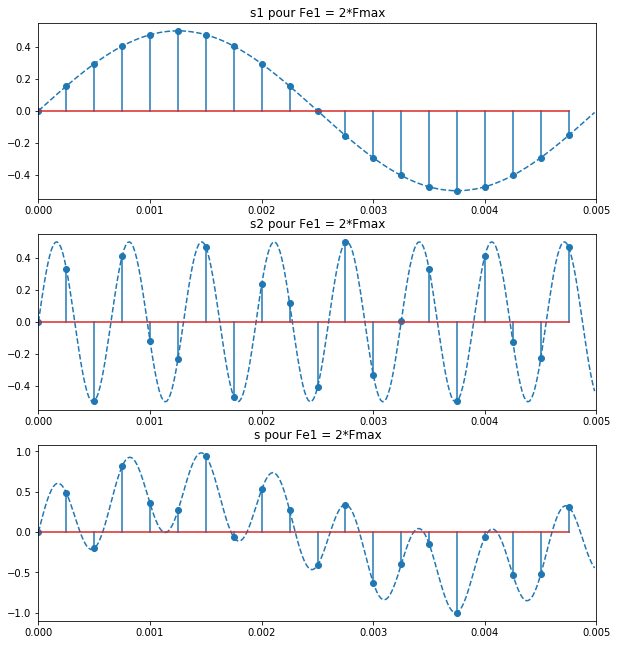

In [9]:
tmax = 0.005
ind  = np.where(t<tmax)       # pour extraire les indices des instants t<tmax 
ind_e  = np.where(te<tmax)    # pour extraire les indices des instants te<tmax

plt.figure(figsize = (10,11))  
plt.subplot(3,1,1)              
plt.plot(t[ind],s1[ind],'--')   # version interpolée continue
plt.stem(te[ind_e],s1e[ind_e])  # version échantillonnée
plt.xlim((0,0.005))
plt.title('s1 pour Fe1 = 2*Fmax')

plt.subplot(3,1,2)
plt.plot(t[ind],s2[ind],'--')   # version interpolée continue
plt.stem(te[ind_e],s2e[ind_e])  # version échantillonnée
plt.xlim((0,0.005))
plt.title('s2 pour Fe1 = 2*Fmax')


plt.subplot(3,1,3)
#Coder ici pour tracer s=s1+s2
plt.plot(t[ind],s[ind],'--')   # version interpolée continue
plt.stem(te[ind_e],se[ind_e])  # version échantillonnée
plt.xlim((0,0.005))
plt.title('s pour Fe1 = 2*Fmax')


**Que constatez - vous ?**
 - on constate que le signal s1 a une grande période alors que le sgnal s2 en a une petite. Ainsi on s'attend alors a retouver ces deux périodes différentes dans le signal s, ce qui est le cas. 
 
 - On voit que le signal s est constitué d'une grande période venant de s1 et d'une petite période (période locale) venant de s2.
 


La fonction *utils_tp.fourier_transform* donne la transformée de Fourier centrée à $0$ d'une signal $s$ avec la fréquence d'échantillonnage $Fe$ donnée.

La fonction *utils_tp.fourier_transform_positif* donne la transformée de Fourier d'une signal $s$ avec la fréquence d'échantillonnage $Fe$ donnée dans la partie fréquence positive.

Text(0.5,0,'Fréquence f')

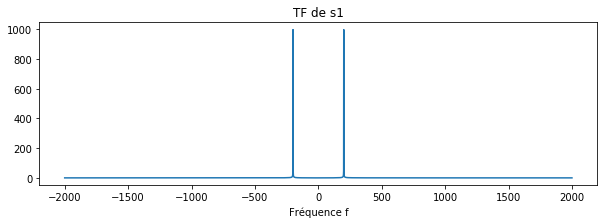

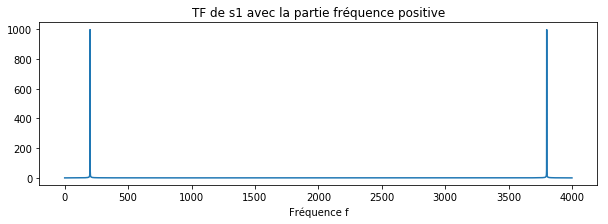

In [10]:
[freq, S1e ] = utils_tp.fourier_transform(s1e,Fe1)
plt.figure(figsize = (10,3))
plt.plot(freq,np.real(np.abs(S1e)))
plt.title("TF de s1")
plt.xlabel("Fréquence f")

[freq, S1e ] = utils_tp.fourier_transform_positif(s1e,Fe1)
plt.figure(figsize = (10,3))
plt.plot(freq,np.real(np.abs(S1e)))
plt.title("TF de s1 avec la partie fréquence positive")
plt.xlabel("Fréquence f")

**Commenter. Que représente le pic à droite sur la 2ème graphique ?**
- Le 2eme pic à droite sur la figure 2 représente le 1er pic (à gauche) du 1er graphique, puisque la différence entre ces deux pics vaut 4000MHz (égal à Fe1=2*Fmax). De la même manière on s'attendrait à un pic de fréquence aux alentours 4250MHz.
- ...

Text(0.5,0,'Fréquence f')

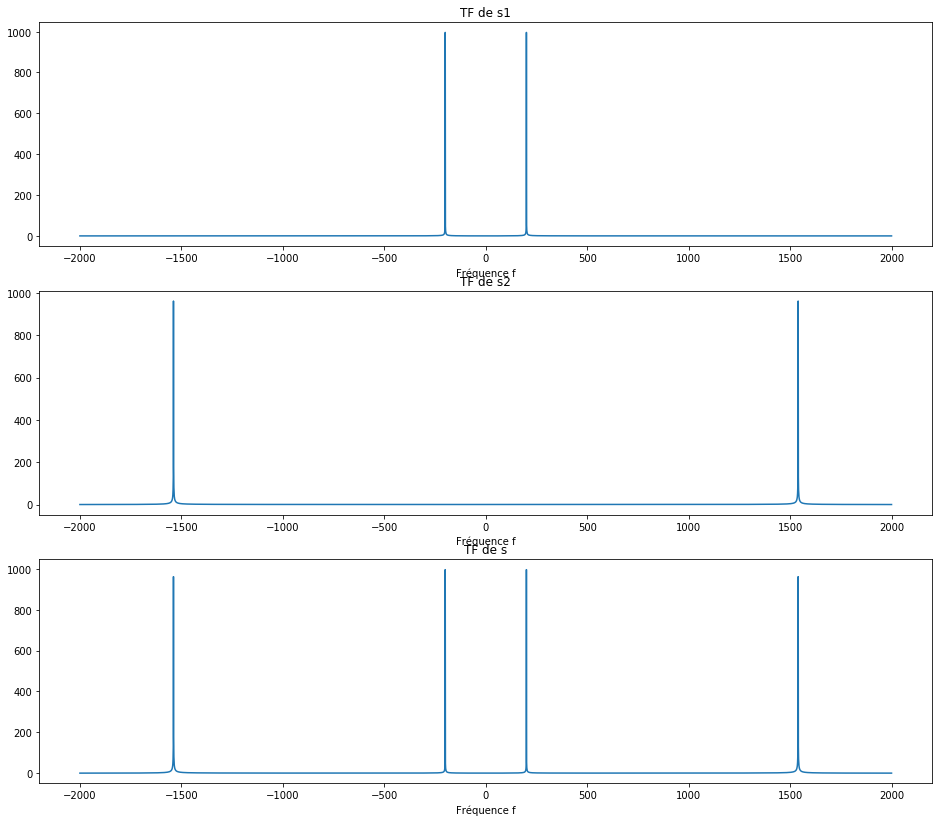

In [11]:
# Coder ici pour présenter les TF des 3 signaux échantillonnés.
plt.figure(figsize = (16,14))
plt.subplot(3,1,1)
[freq, S1e ] = utils_tp.fourier_transform(s1e,Fe1)
plt.plot(freq,np.real(np.abs(S1e)))
plt.title("TF de s1")
plt.xlabel("Fréquence f")


plt.subplot(3,1,2)
[freq, S2e ] = utils_tp.fourier_transform(s2e,Fe1)
plt.plot(freq,np.real(np.abs(S2e)))
plt.title("TF de s2")
plt.xlabel("Fréquence f")


plt.subplot(3,1,3)
[freq, Se ] = utils_tp.fourier_transform(se,Fe1)
plt.plot(freq,np.real(np.abs(Se)))
plt.title("TF de s")
plt.xlabel("Fréquence f")

**Commenter ?**

 - Ici on remarque que le TF du signal s n'est rien d'autre que la somme des TF des signaux s1 et S2. 0n retrouve ainsi l'apparition des pics observé sur s1 et s2 avec les même fréquences. 
 
 - On remarque aussi qu'il n'y a pas l'effet aliasing. on s'attendais à ça car Fe1 est supérieur à 2*Fmax/10 et aussi supérieur à 2*10*Fmax/13.


### 1.2 Echantillonner avec aliasing (repliement)

On choisit maintenant d'utiliser la fréquence d'échantillonnage $Fe_2 = F_{max} = 2000$ Hz. Construire les nouvelles versions des signaux $s_1$, $s_2$ et $s$ échantillonnés à cette fréquence.

In [12]:
Fe2   = Fmax                        # frequence d'echantillonnage Shannon
tbis  = np.linspace(0,T,num=Fe2*T)  # pour définir une liste de Fe2*T échantillons de 0 à T
s1bis = 0.5*np.sin(2*np.pi*Fmax/10*tbis)        # valeurs de x1 aux instants t
s2bis = 0.5*np.sin(2*np.pi*10*Fmax/13*tbis)     # valeurs de x2 aux instants t
sbis  = s1bis + s2bis

In [13]:
# Coder ici pour écouter les signaux échantillonée.
# puis comparer avec les versions précédentes, commenter
Audio(s2e, rate=Fe1)

Text(0.5,0,'Fréquence f')

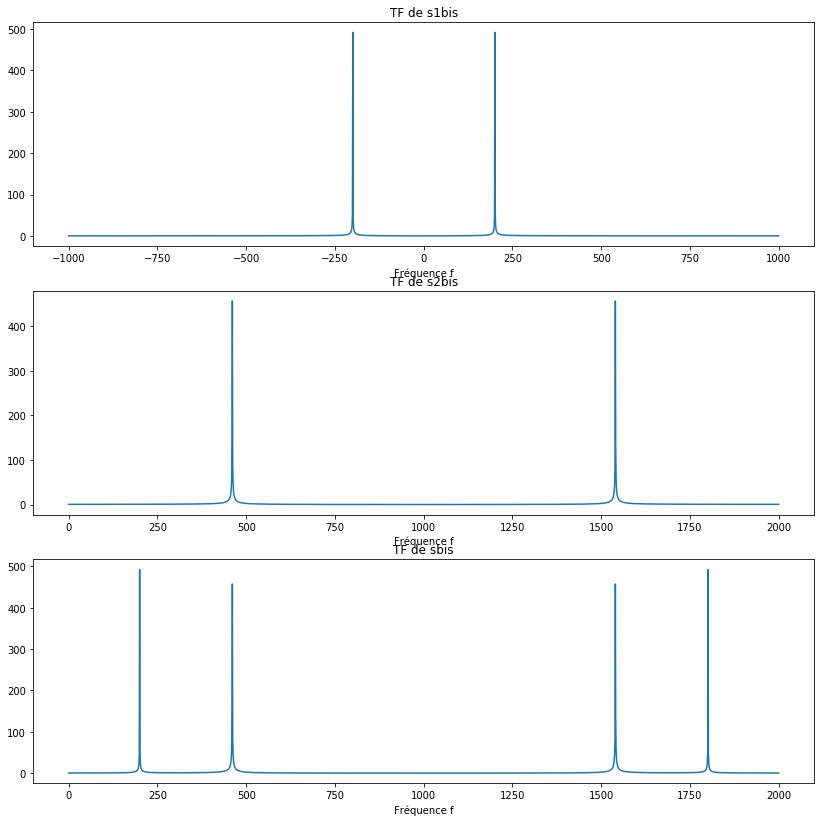

In [14]:
# Coder ici pour présenter les TF des 3 signaux échantillonnés.
plt.figure(figsize = (14,14))
plt.subplot(3,1,1)
[freq, S1bis ] = utils_tp.fourier_transform(s1bis,Fe2)
plt.plot(freq,np.real(np.abs(S1bis)))
plt.title("TF de s1bis")
plt.xlabel("Fréquence f")

plt.subplot(3,1,2)
[freq, S2bis ] = utils_tp.fourier_transform_positif(s2bis,Fe2)
plt.plot(freq,np.real(np.abs(S2bis)))
plt.title("TF de s2bis")
plt.xlabel("Fréquence f")


plt.subplot(3,1,3)
[freq, Sbis ] = utils_tp.fourier_transform_positif(sbis,Fe2)
plt.plot(freq,np.real(np.abs(Sbis)))
plt.title("TF de sbis")
plt.xlabel("Fréquence f")


**Que constatez - vous ?**

- on remarque qu'il n'ya pas d'Aliasing dans le premier signal. Ceci est normal car Fe2=Fmax > 2*f1 = Fmax/5.

- on remarque qu'il y a l'Aliasing dans le deuxième signal. Ceci est aussi normal car Fe2=Fmax < 2*f2 = 20*Fmax/13. Graphiquement on peut le constater par le biais de l'apparition du pic aux alentours de 500. En effet on ne s'attendait pas à ce pic car la fréquence maximale de s2 est 1532 (10*Fmax/13), du coup l'apparition de ce pic (qui est d'ailleurs similaire à celui de 1532) montre un phénomène d'Alisasing.

- Puisque sbis est la somme de s1bis et de s2bis, alors il y'aura l'effet aliasing sur sbis aussi.

On observe un phénomène de repliement spectral de l'une des composantes du signal. Quelle est la composante repliée et quel est le nouveau signal $\hat{s_a}(t)$ réellement entendu ? En donner **une expression explicite** en temps continu.

 - La composante du signal qui est repliée est s2bis.
 
$$ \hat{s}_a(t) = 0.5 sin(2\pi(f_2 - F_{max})t) = -0.5 sin(2\pi(\frac{3F_{max}}{13})t)$$

Vérifier que la théorie du repliement spectral permet bien d'expliquer les observations grâce à un graphique bien choisi. On pourra par exemple représenter sur un même graphique les échantillons à $Fe_2=2000$Hz, une version (quasi) continue du signal d'origine et une version (quasi) continue du signal replié prédit à la question précédente, toujours pour un court intervalle de temps de $0.005$ s.

Text(0.5,1,'sa_hat et le signal quasi continu, pour Fe2 = Fmax')

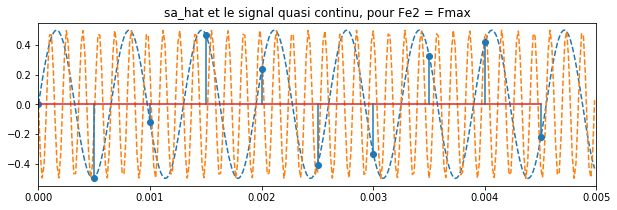

In [15]:
# Coder la fonction explicite de sa_hat(t) ici
# s2hat  = 0.5*np.sin(2*np.pi*(-3)*Fmax/13*te)
sa_hat  = -0.5*np.sin(2*np.pi*(3*Fmax/13)*te)

# Coder ici pour représenter sur le même graphique 
# signal quasi continue, 
# signal échantillonné à Fe2 
# et sa_hat(t) la version reconstruite à partir du signal échantillonnée à Fe2
# signal quasi continue,
# signal échantillonné à Fe2
# et sa_hat(t) la version reconstruite à partir du signal échantillonnée à Fe2

ind_bis  = np.where(tbis<tmax)    # pour extraire les indices des instants te<tmax

plt.figure(figsize = (10,3))               
plt.plot(t[ind],s2[ind],'--')
plt.plot(t[ind],sa_hat[ind],'--')
plt.stem(tbis[ind_bis],s2bis[ind_bis])
plt.xlim((0,0.005))
plt.title('sa_hat et le signal quasi continu, pour Fe2 = Fmax')

**Commenter**

- on constate que la version reconstruite n'est pas la meme que la vraie. Sa fréquence semble etre plus faible ce qui conduit à l'apparition de plusieurs pics entre les pics du vrai signal. C'est dû à l'effet du repliement qui a tendance a modifier le signal.

## Partie 2 : Fréquence d'échantillonnage à l'acquisition ou à la lecture

In [16]:
############## Do not change #################
n = 1024*13  # number of samples            ##
Fe = 15000   # sampled frequency            ##
# On charge le signal audio                 ##
s = load_sound("audio/bird.wav",n)          ##
##############################################

In [17]:
# On écoute le signal à la fréquence d'échantillonnage fixée ci-dessus.
Audio(s, rate = Fe)

In [18]:
# On écoute le même signal en diminuant par 2 la fréquence d'échantillonnage
Audio(s, rate = Fe/2)

**Que constatez-vous ? Expliquer pourquoi.**

- on on constate une dilatation du son.

- cela est du au fait que nous avons réduit la fréquence à Fe/2 sans faire une correction.

**Quelle manipulation proposez-vous sur le signal afin de corriger le phénomène en gardant la diminution de Fe ? **
- Pour garder une bonne qualité au niveau de l'écoute avec une fréquence divisée par 2, il faut faire des sauts de pas de 2 dans le signal brut.

In [19]:
# Coder ici pour écouter le même signal en diminuant par 2 la fréquence d'échantillonnage.
# on prend le signal brut avec un pas de 2
Audio(s[::2], rate = Fe/2)

In [20]:
# Essayer avec plusieurs facteurs de diminution et commenter !
# on prend le signal brut avec un pas de 3
Audio(s[::3], rate = Fe/3)

In [21]:
# on prend le signal brut avec un pas de 4
Audio(s[::4], rate = Fe/4)

In [22]:
# on prend le signal brut avec un pas de 5
Audio(s[::5], rate = Fe/5)

**commentaire**
- Plus on diminue la fréquence, plus on perd le signal original, meme si on fait des sauts.

- la raison est qu'il y a une perte d'informations lorsque le saut est effectué avec de grands pas. on aura à cet effet laisser tomber beaucoup de signaux entre les pas. Par exemple, si on échantillone un signal brut sur 100 points avec une fréquence $F_e = \frac{1}{5T_e}$, il faudra considérer que uniquement 20 points de l'échantillon collecté (un saut de 5 pour chaque élément successif) d'où la perte d'informations.

## Partie 3 : Analyse par morceaux
**Objectif** : calculer la transformée de Fourier de différents segments du signal autour de plusieurs instants $n_k$ et la représenter en module pour mettre en évidence les variations du contenu fréquentiel du signal au cours du temps.
Pour cela, nous considérons la transformée de Fourier du signal $s \times w$ où w est fonction fenêtre régulière centrée sur $n_k$. 

Utiliser par exemple *une fenêtre gaussienne* d'une largeur de $2N+1$ échantillons avec $N=400$ et $\sigma = 200$.

Text(0.5,0,'Fréquence f')

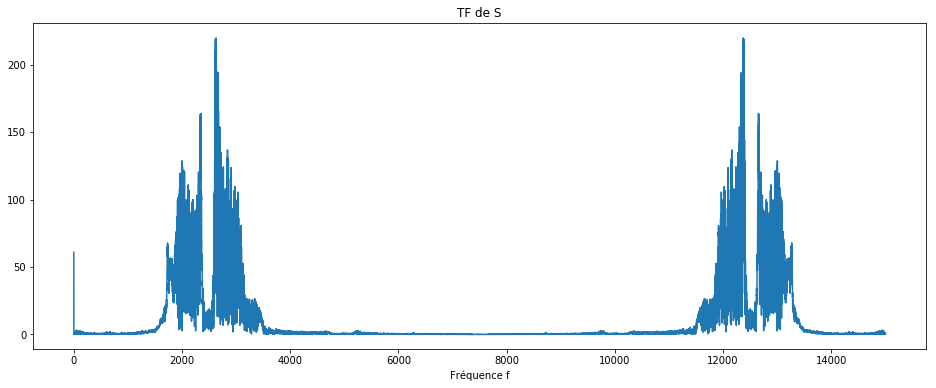

In [23]:
# Tout d'abord, représenter ici la TF (centrée à 0) du signal "bird" 
s = load_sound("audio/bird.wav",n)
Fe = 15000   # sampled frequency 
[freq, S ] = utils_tp.fourier_transform_positif(s,Fe)
plt.figure(figsize = (16,6))
plt.plot(freq,np.real(np.abs(S)))
plt.title("TF de S")
plt.xlabel("Fréquence f")

### 3.1 Influence du type de fenêtre

In [24]:
############## Do not change #################
N=400                                       ##
L=2*N+1                                     ##
##############################################

Text(0.5,1,'|X(f)|')

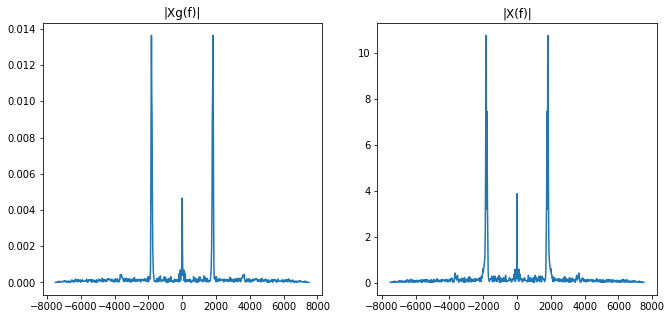

In [25]:
# Exemple pour TF sur un morceau
n0=1000
seg=np.array(range(n0-N,n0+N+1)) # L points
sigma=200                                   
gauss_win = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma**2)
Xg= np.fft.fftshift( np.fft.fft(gauss_win*s[seg]))
X= np.fft.fftshift( np.fft.fft(s[seg]))
freq=np.linspace(-Fe/2,Fe/2,L)
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.plot(freq,np.real(np.abs(Xg)))
plt.title("|Xg(f)|")
plt.subplot(1,2,2)
plt.plot(freq,np.real(np.abs(X)))
plt.title("|X(f)|")

**Que représentent $|Xg(f)|$ et $|X(f)|$ ? Que constatez-vous ? Expliquer pourquoi.**
- $|Xg(f)|$ représente la transformation de fourier d'un signal de loi normale tandis que $|X(f)|$ représente la transformation de fourier d'une porte. La TF d'un gaussien est aussi gaussien tandis que la TF d'une porte est le sinus cardinal.
- On constate que les pics de $|Xg(f)|$ et de $|X(f)|$ n'ont pas la même largeur, celle de $|X(f)|$ sont plus grandes. 
- Ceci est due à la superposition (somme) de plusieurs sinus cardinal dans le domaine fréquentiel.

### 3.2 Influence de la largeur (durée) de la fenêtre
En gardant le même nombre d'échantillons (N, donc L). 

Afficher la fenêtre gaussienne pour différentes valeurs de sigma (50, 100 ,200 et 250) ainsi qu'un exemple de segment de signal  pour une localisation fixée.


Text(0.5,1,'|Xg(f)|, sigma=250')

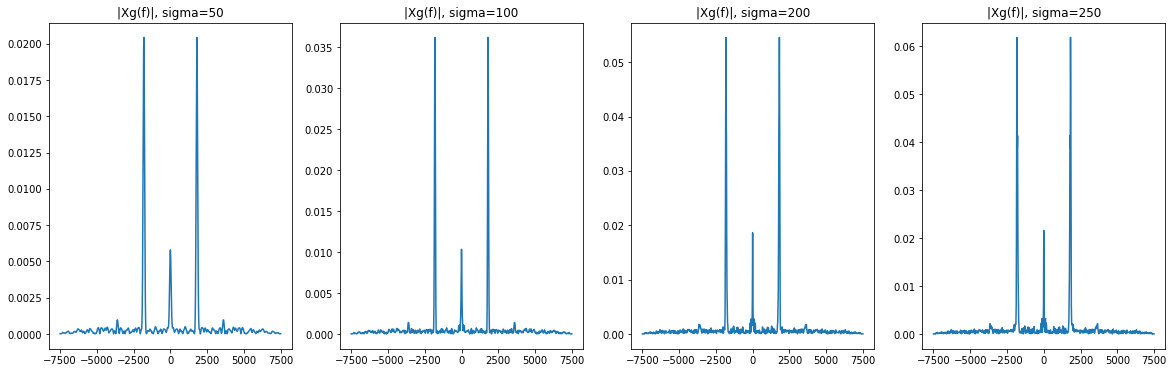

In [26]:
# Coder ici 
n0=1000
seg=np.array(range(n0-N,n0+N+1)) # L points

sigma=50   # changer sigma                               
gauss_win = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma**2)
Xg= np.fft.fftshift( np.fft.fft(gauss_win*s[seg]))

sigma2=100   # changer sigma                               
gauss_win2 = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma2**2)
Xg2= np.fft.fftshift( np.fft.fft(gauss_win2*s[seg]))

sigma3=200   # changer sigma                               
gauss_win3 = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma3**2)
Xg3= np.fft.fftshift( np.fft.fft(gauss_win3*s[seg]))

sigma4=250   # changer sigma                               
gauss_win4 = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma4**2)
Xg4= np.fft.fftshift( np.fft.fft(gauss_win4*s[seg]))

freq=np.linspace(-Fe/2,Fe/2,L)
X= np.fft.fftshift( np.fft.fft(s[seg]))

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(freq,np.real(np.abs(Xg)))
plt.title("|Xg(f)|, sigma=50")

plt.subplot(1,4,2)
plt.plot(freq,np.real(np.abs(Xg2)))
plt.title("|Xg(f)|, sigma=100")

plt.subplot(1,4,3)
plt.plot(freq,np.real(np.abs(Xg3)))
plt.title("|Xg(f)|, sigma=200")

plt.subplot(1,4,4)
plt.plot(freq,np.real(np.abs(Xg4)))
plt.title("|Xg(f)|, sigma=250")

**Commenter**
- De gauche à droite, nous remarquons que lorsque sigma augmente, l'épaisseur autour des pics se rétrécit d'avantage. 
- Ce phénomène est due au fait que lorsque sigma est grand dans le domaine temporel (faible précision), la précision devient très élevé dans le domaine fréquentiel d'où un pic plus accentué pour $\sigma = 250$ (épaisseur très petite autour des pics). Il s'agit du théorème de **Gabor Heisenberg**.  

Exemple de segment pour une localisation fixée : on prend nk = 200 avec un pas de 200.

En représentant un seul segment, on choisit n0=400 et on se retrouve avec un intervalle de segment de [-200, 200]. La représention est faite ci-dessous pour les 4 valeurs de sigma données.

Text(0.5,1,'|Xg(f)|, sigma=250')

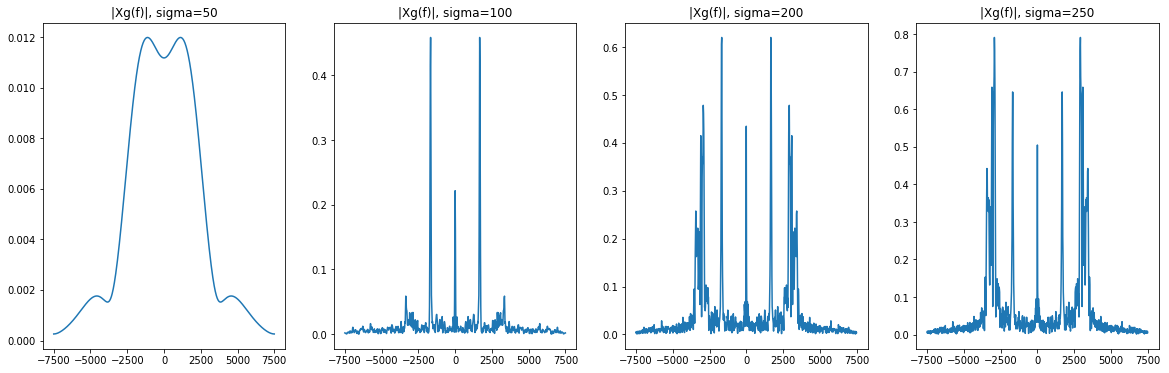

In [27]:
# Exemple pour TF sur un morceau

n0=200
seg=np.array(range(n0-N,n0+N+1)) # L points

## sigma = 50
sigma=2   # changer sigma                               
gauss_win = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma**2)
Xg= np.fft.fftshift( np.fft.fft(gauss_win*s[seg]))

sigma2=100   # changer sigma                               
gauss_win2 = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma2**2)
Xg2= np.fft.fftshift( np.fft.fft(gauss_win2*s[seg]))

sigma3=200   # changer sigma                               
gauss_win3 = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma3**2)
Xg3= np.fft.fftshift( np.fft.fft(gauss_win3*s[seg]))

sigma4=250   # changer sigma                               
gauss_win4 = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma4**2)
Xg4= np.fft.fftshift( np.fft.fft(gauss_win4*s[seg]))

freq=np.linspace(-Fe/2,Fe/2,L)
X= np.fft.fftshift( np.fft.fft(s[seg]))

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)#.set_xlim([freq2.min(),freq2.max()])
plt.plot(freq,np.real(np.abs(Xg)))
plt.title("|Xg(f)|, sigma=50")

plt.subplot(1,4,2)#.set_xlim([freq2.min(),freq2.max()])
plt.plot(freq,np.real(np.abs(Xg2)))
plt.title("|Xg(f)|, sigma=100")

plt.subplot(1,4,3)#.set_xlim([freq2.min(),freq2.max()])
plt.plot(freq,np.real(np.abs(Xg3)))
plt.title("|Xg(f)|, sigma=200")

plt.subplot(1,4,4)#.set_xlim([freq2.min(),freq2.max()])
plt.plot(freq,np.real(np.abs(Xg4)))
plt.title("|Xg(f)|, sigma=250")

**Commenter**
L'intérêt du découpage par morceaux dans le domaine fréquentiel est double :
- D'une part, elle nous permet de gagner en terme de temps de calcul lors des opérations (grâce à la subdivision des tâches)
- D'autre part, elle nous permet de savoir, à partir du spectre présent sur un segment, de connaitre avec une grande précision quel pic du spectre appartient à quel intervalle dans le domaine temporel.

### 3.3 Analyse par morceaux
Pour $\sigma=200$, écrire une boucle **for** permettant de répéter l'analyse ci-dessus pour des segments de signal autour de plusieurs instants nk, par exemple de nk=200 à nk=5000 par pas de 200. On représentera aussi tous ces spectres ensemble sur un seul et même graphique. 

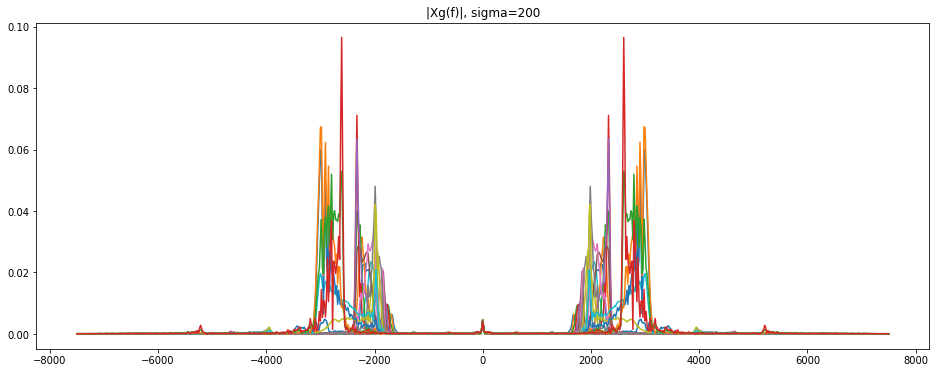

In [28]:
# Coder ici 

plt.figure(figsize=(16,6))
for n0 in range (200,5000,200) :
    seg = np.array(range(n0-N, n0+N+1)) 
    sigma=200   # fixer sigma                               
    gauss_win = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(seg-n0)**2/2/sigma**2)
    Xg= np.fft.fftshift( np.fft.fft(gauss_win*s[seg]))
    freq  = np.linspace(-Fe/2, Fe/2, L)
    
    plt.plot(freq,np.real(np.abs(Xg)))
    plt.title("|Xg(f)|, sigma=200")

**Que remarquez-vous ? Commenter**
- On remarque la superposition des différents segments et l'apparition de plusieurs spectres de couleur différentes. Chaque spectre correspond à un nk fixé.
- Les pics des spectres pour différents segments sont a peu près localisés au même endroit ([1500,3500] dans le domaine fréquentiel positif).
- On remarque que les localisations des pics de fréquence sont différentes à chaque fois que l'on change de fenêtre, ceci nous permet de retrouver différents intervalles dans le domaine temporel, d'où l'intérêt de représentation simultanée.